In [55]:
###### import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
import lightkurve as lk
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [56]:
df = pd.read_csv('C:/Users/jojoa/GitHub/disperse/data/preliminary_results.csv')

In [57]:
df

,date,ew,ew_unc,file_basename,full_filepath,gaussian_width,gaussian_width_unc,int_wv,jd,n_samples,obs_line_center,obs_line_center_unc,qidx,star_name,time
0,2020-07-16,1.395743,1.181927e-02,Goldilocks_20200716T094818_v1.0_0033.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-11b\P4\G...,1.106646,8.985081e-03,8542.0,2.459047e+06,5000.0,8.542580e+03,5.904067e-03,6245.0,HAT-P-11,09:48:47
1,2020-07-16,1.393962,1.222317e-02,Goldilocks_20200716T095404_v1.0_0034.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-11b\P4\G...,1.105402,9.202246e-03,8542.0,2.459047e+06,5000.0,8.542570e+03,6.376022e-03,6245.0,HAT-P-11,09:54:28
2,2020-07-24,1.363680,1.153400e-02,Goldilocks_20200724T094542_v1.0_0025.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-11b\P4\G...,1.020919,8.568031e-03,8542.0,2.459055e+06,5000.0,8.542622e+03,5.690058e-03,7146.0,HAT-P-11,09:46:12
3,2020-07-24,1.353340,1.179830e-02,Goldilocks_20200724T095128_v1.0_0026.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-11b\P4\G...,1.016422,8.953680e-03,8542.0,2.459055e+06,5000.0,8.542621e+03,6.048049e-03,7146.0,HAT-P-11,09:51:53
4,2020-08-01,1.350427,1.515268e-02,Goldilocks_20200801T030803_v1.0_0004.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-11b\P4\G...,1.006933,1.134170e-02,8542.0,2.459063e+06,5000.0,8.542646e+03,7.465504e-03,7226.0,HAT-P-11,03:08:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2019-10-22,-0.691427,2.336325e-02,Goldilocks_20191022T020027_v1.0_0006.spectra.fits,../data/HPF/Helium-transit-data\WASP-69b\out-o...,1.343556,2.878386e-02,8542.0,2.458779e+06,5000.0,8.541701e+03,3.355662e-02,NaN,WASP_69_out_1_after_4,02:00:52
401,2020-07-23,17.731751,2.055538e+00,Goldilocks_20200723T055838_v1.0_0006.spectra.fits,../data/HPF/Helium-transit-data\WASP-80b\Goldi...,7.572096,1.366191e+00,8542.0,2.459054e+06,5000.0,8.534557e+03,1.348364e+00,7144.0,WASP-80,05:59:07
402,2020-07-23,804957.885020,4.804489e+06,Goldilocks_20200723T060741_v1.0_0007.spectra.fits,../data/HPF/Helium-transit-data\WASP-80b\Goldi...,990695.465321,5.882518e+06,8542.0,2.459054e+06,5000.0,-8.794204e+07,1.864819e+09,7144.0,WASP-80,06:08:11
403,2020-08-01,-1.055729,1.344991e-01,Goldilocks_20200801T052720_v1.0_0023.spectra.fits,../data/HPF/Helium-transit-data\WASP-80b\Goldi...,1.575354,8.242386e-02,8542.0,2.459063e+06,5000.0,8.540966e+03,9.178269e-02,7224.0,WASP-80,05:27:48


In [58]:
pd.options.display.max_rows = 100

In [59]:
df.star_name.value_counts()

HAT-P-67b_IN_2                14
HAT-P-67b_IN_1                14
HAT-P-17b_IN_1b               11
HAT-P-17b_IN_3                10
HAT-P-67b_OUT_same3            9
HAT-P-67b_IN_3                 9
WASP_69_in_2                   7
HAT-P-32_1_IN                  6
HAT-P-32_3_IN                  6
k2-266_out_same                6
k2-266_in                      6
HAT-P-11                       6
TrES-1                         6
HAT-P-17b_OUT_1b_before1       6
HAT-P-17b                      6
HD189733                       6
HAT-P-12_OUT_2                 5
WASP-127_OUT_before1           5
Tres-1b_IN_4                   5
HAT-P-12_OUT_1                 5
Tres-1b_IN_2b                  5
HAT-P-12_IN_2                  5
HAT-P-12_OUT_1_before2         5
Tres-1b_4_same                 5
Tres-1b_3after2_4before        4
Qatar-1                        4
HAT-P-67b_OUT_2_before1        4
Kepler-16                      4
Tres-1b_3after_4before2        4
HAT-P-12_OUT_1_before1         4
WASP_69_ou

We retrieved the data for the planets from [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

In [60]:
target_name = 'HAT-P-67'
orbital_period = 2.15000820
t_c = 2455867.402743
t_c_btjd = t_c-2457000.0 #neg value means discovered before TESS

In [61]:
target_mask = df.star_name.str.contains(target_name)
df = df[target_mask]
keep_mask = df.ew_unc < 10 #original value = 1

In [62]:
df

,date,ew,ew_unc,file_basename,full_filepath,gaussian_width,gaussian_width_unc,int_wv,jd,n_samples,obs_line_center,obs_line_center_unc,qidx,star_name,time
158,2020-04-28,17.197802,2.270254,Goldilocks_20200428T061002_v1.0_0008.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,7.714900,1.271535,8542.0,2.458968e+06,5000.0,8534.082881,1.248851,6437.0,HAT-P-67b_IN_1,06:10:31
159,2020-04-28,14.940468,3.382155,Goldilocks_20200428T061548_v1.0_0009.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,6.467460,1.722693,8542.0,2.458968e+06,5000.0,8535.366902,1.731632,6437.0,HAT-P-67b_IN_1,06:16:12
160,2020-04-28,-0.635988,0.518351,Goldilocks_20200428T062128_v1.0_0010.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,0.763609,0.182162,8542.0,2.458968e+06,5000.0,8541.164294,0.170944,6437.0,HAT-P-67b_IN_1,06:21:53
161,2020-04-28,16.621287,1.952871,Goldilocks_20200428T062708_v1.0_0011.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,7.379331,1.120811,8542.0,2.458968e+06,5000.0,8534.385885,1.097494,6437.0,HAT-P-67b_IN_1,06:27:34
162,2020-04-28,17.775723,2.296507,Goldilocks_20200428T063248_v1.0_0012.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,8.037958,1.269116,8542.0,2.458968e+06,5000.0,8533.817761,1.248502,6437.0,HAT-P-67b_IN_1,06:33:15
163,2020-04-28,17.923117,2.577567,Goldilocks_20200428T063828_v1.0_0013.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,8.105911,1.439084,8542.0,2.458968e+06,5000.0,8533.725684,1.415148,6437.0,HAT-P-67b_IN_1,06:38:57
164,2020-04-28,18.183791,2.646531,Goldilocks_20200428T064408_v1.0_0014.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,8.260495,1.444765,8542.0,2.458968e+06,5000.0,8533.569839,1.420389,6437.0,HAT-P-67b_IN_1,06:44:38
165,2020-04-28,18.676562,2.459384,Goldilocks_20200428T064954_v1.0_0015.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,8.544274,1.316426,8542.0,2.458968e+06,5000.0,8533.333721,1.297406,6437.0,HAT-P-67b_IN_1,06:50:19
166,2020-04-28,18.294819,2.405408,Goldilocks_20200428T065535_v1.0_0016.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,8.326660,1.302605,8542.0,2.458968e+06,5000.0,8533.540543,1.282714,6437.0,HAT-P-67b_IN_1,06:56:00
167,2020-04-28,17.829194,2.478243,Goldilocks_20200428T070116_v1.0_0017.spectra.fits,../data/HPF/Helium-transit-data\HAT-P-67b\in-t...,8.056148,1.368259,8542.0,2.458968e+06,5000.0,8533.783509,1.342483,6437.0,HAT-P-67b_IN_1,07:01:41


In [63]:
df = df[keep_mask]
in_transit_mask = df.star_name.str.contains('_IN')

In [64]:
df['ew']=df.ew.astype(np.float).values #change str to float
df['btjd']=df['jd']-2457000.0 #cut down JD to smaller scale

In [65]:
sn_ratio=2
good_data_mask=(df.ew/df.ew_unc)>sn_ratio #signal to noise ratio

In [66]:
df=df[good_data_mask]

In [67]:
x_line=df['ew'].median() #calculate horizontal line going between in/out of transit points
x_line

18.12748894184838

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

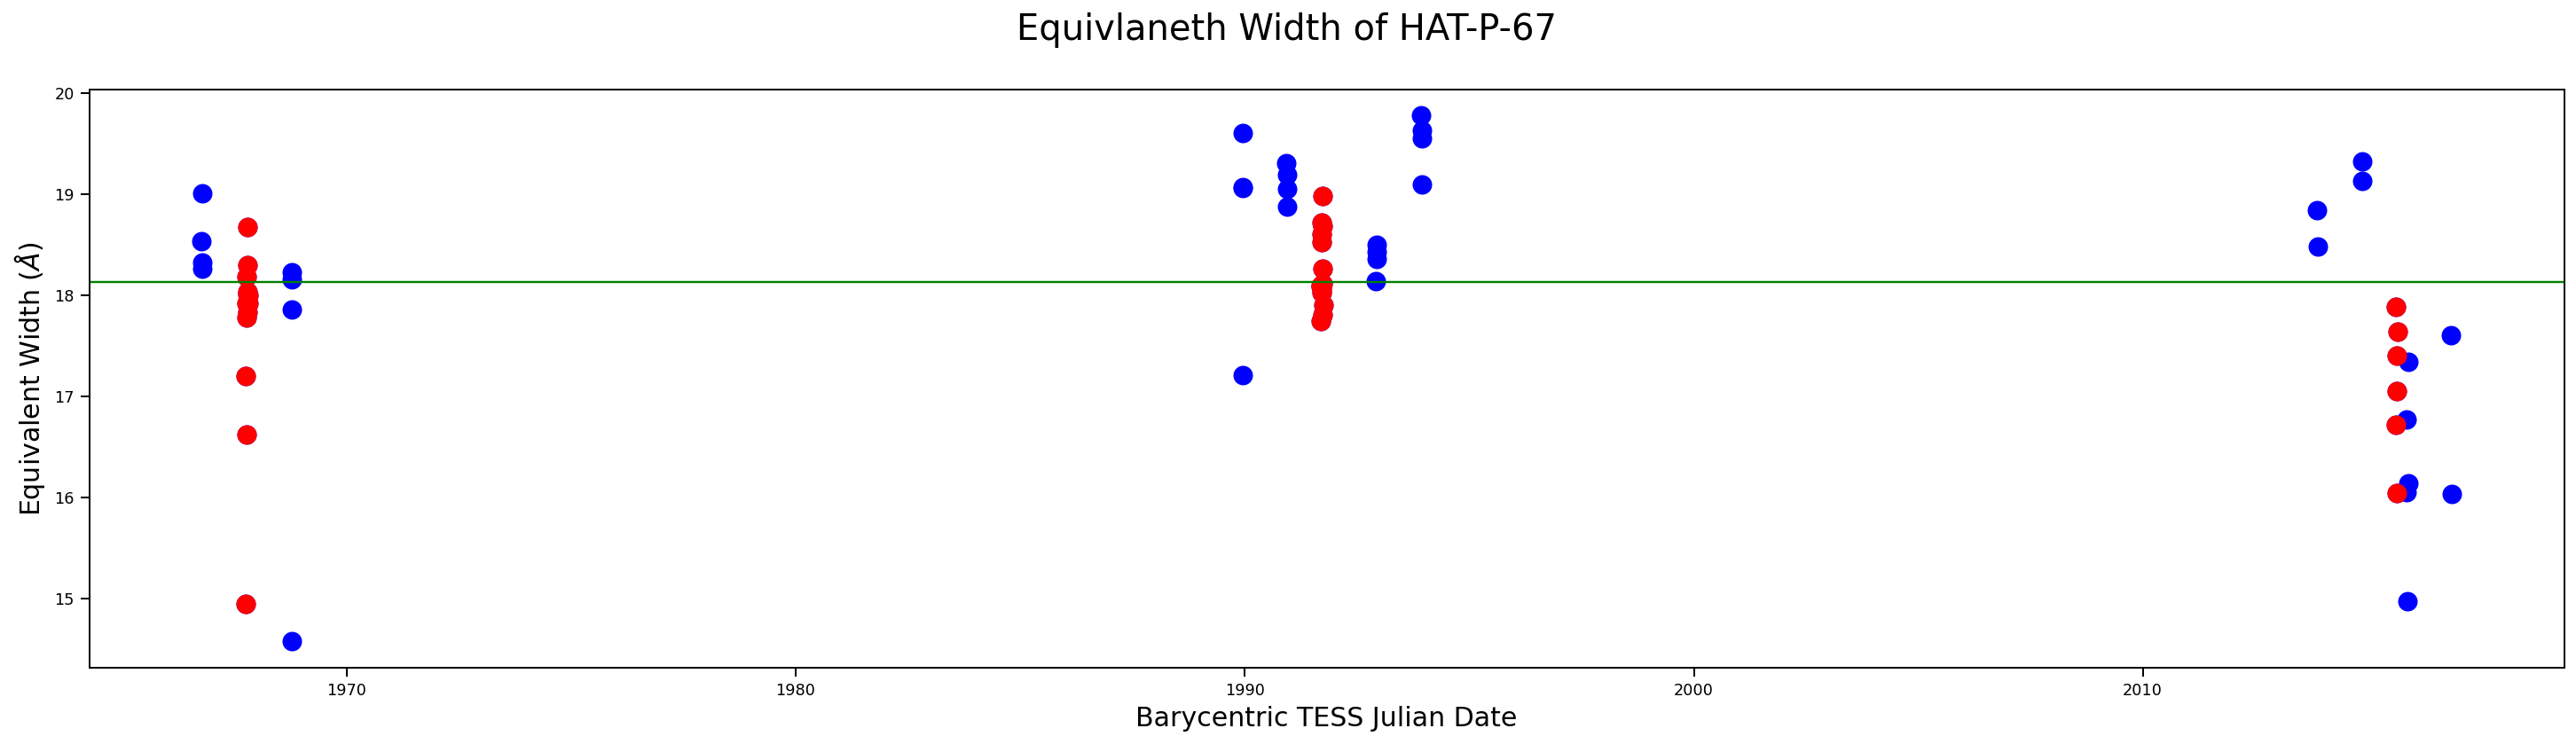

In [68]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=10)
plt.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
#plt.ylim(0)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'C:/Users/jojoa/GitHub/disperse/figures/{target_name}.jpg')

Let's compute the normalized phase shifted so that the transit midpoint always occurs at zero while also seeing the light curve before and after the midpoint.

$$\phi=\frac{\mod(t-T_c+\frac{P}{2}\;,P)}{P} -0.5$$ 

In [69]:
df['phase']=np.mod(df.btjd-t_c_btjd+(orbital_period*0.5),orbital_period)-0.5*orbital_period
df['normalized_phase']=(df['phase']/orbital_period)-0.5

In [70]:
df.describe() #max less than orbital period, normalized less than 1

,ew,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,n_samples,obs_line_center,obs_line_center_unc,qidx,btjd,phase,normalized_phase
count,68.000000,68.000000,68.000000,68.000000,68.0,6.800000e+01,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,18.003135,2.923546,8.127487,1.512546,8542.0,2.458990e+06,5000.0,8533.851145,1.530214,6630.617647,1990.341135,0.241189,-0.387820
std,1.109423,1.039284,0.563049,0.332846,0.0,1.796788e+01,0.0,0.609094,0.467494,191.808131,17.967883,0.539149,0.250766
min,14.572387,1.952871,6.467460,1.120811,8542.0,2.458967e+06,5000.0,8532.901547,1.097494,6436.000000,1966.770274,-0.944294,-0.939205
25%,17.716298,2.417047,7.923861,1.338082,8542.0,2.458969e+06,5000.0,8533.458828,1.316727,6437.750000,1968.532545,0.045701,-0.478744
50%,18.127489,2.571832,8.184452,1.416624,8542.0,2.458992e+06,5000.0,8533.701664,1.395802,6587.000000,1991.712972,0.348314,-0.337994
75%,18.687887,2.731080,8.485990,1.509278,8542.0,2.458999e+06,5000.0,8534.100426,1.488885,6684.500000,1998.929138,0.638263,-0.203135
max,19.777141,7.146584,9.060774,3.206001,8542.0,2.459017e+06,5000.0,8535.722295,4.248530,6943.000000,2016.873009,1.071125,-0.001804


Text(0, 0.5, 'Equivalent Width ($\\AA$)')

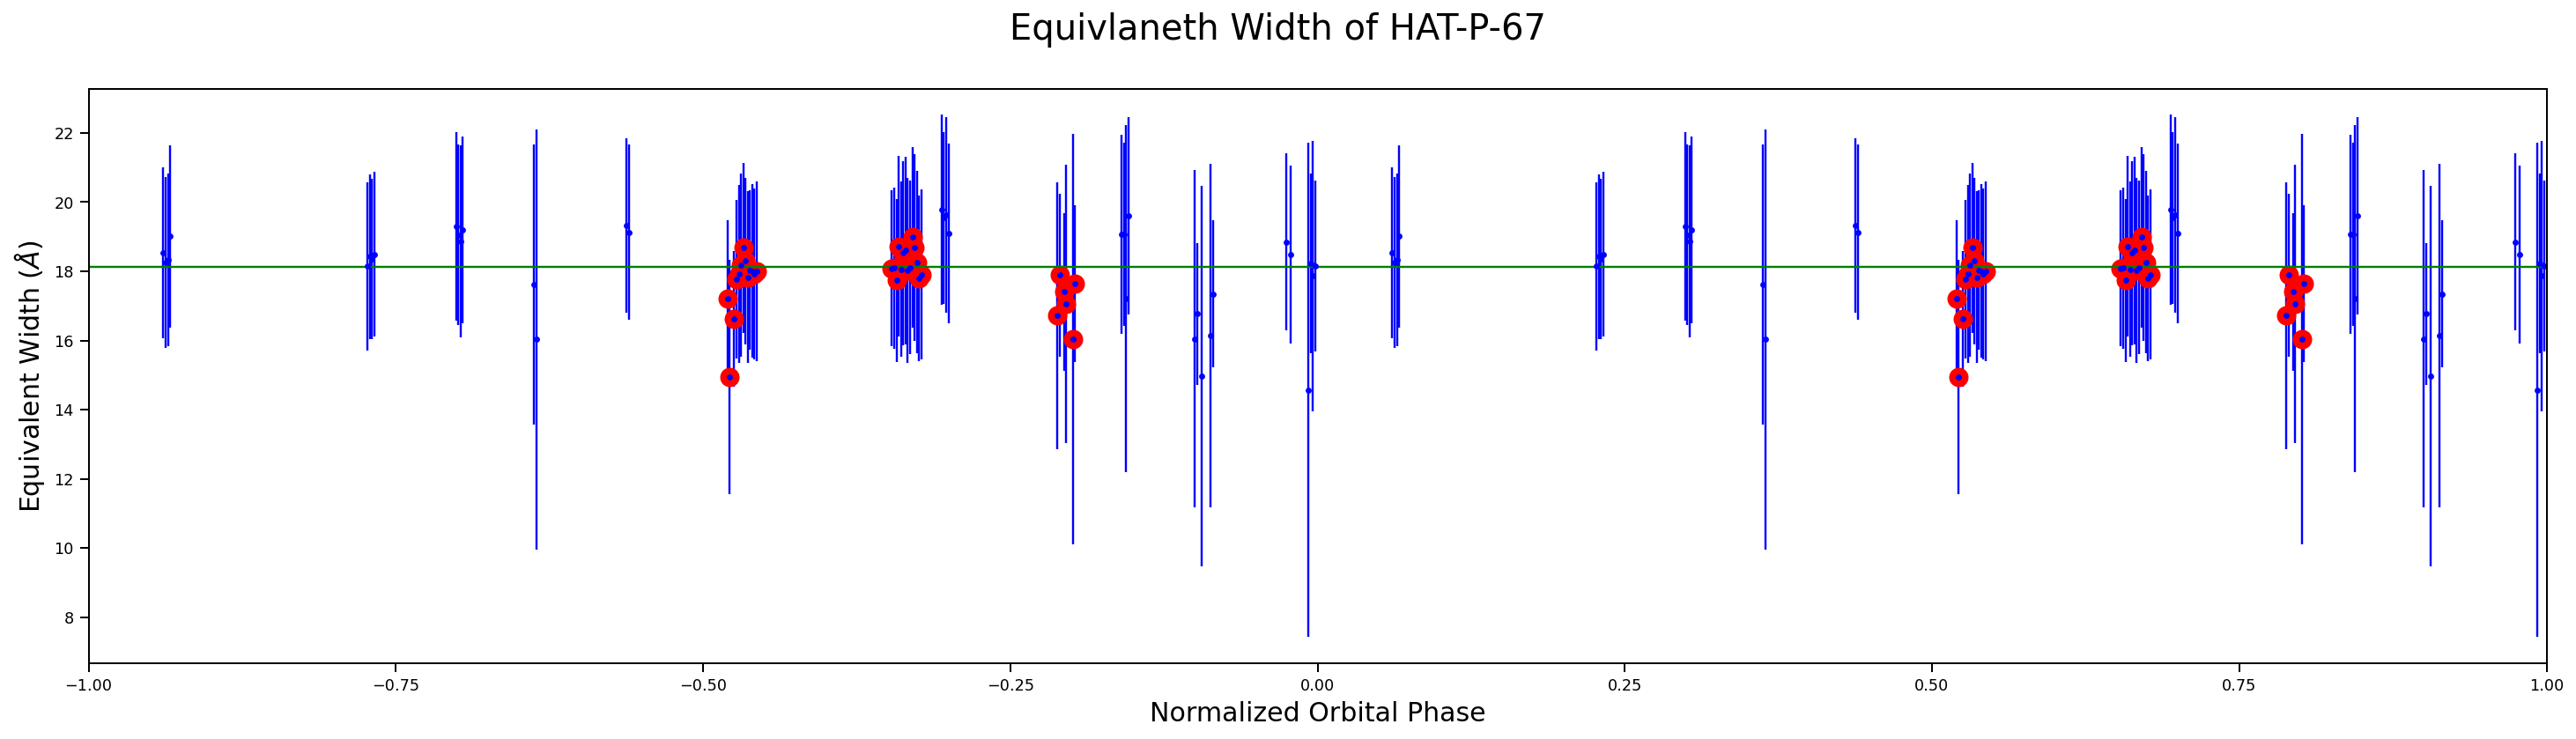

In [73]:
plt.figure(figsize=(25,6))

plt.errorbar(df.normalized_phase, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.normalized_phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

plt.errorbar(df.normalized_phase-1, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

plt.errorbar(df.normalized_phase+1, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
plt.xlim(-1,1)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

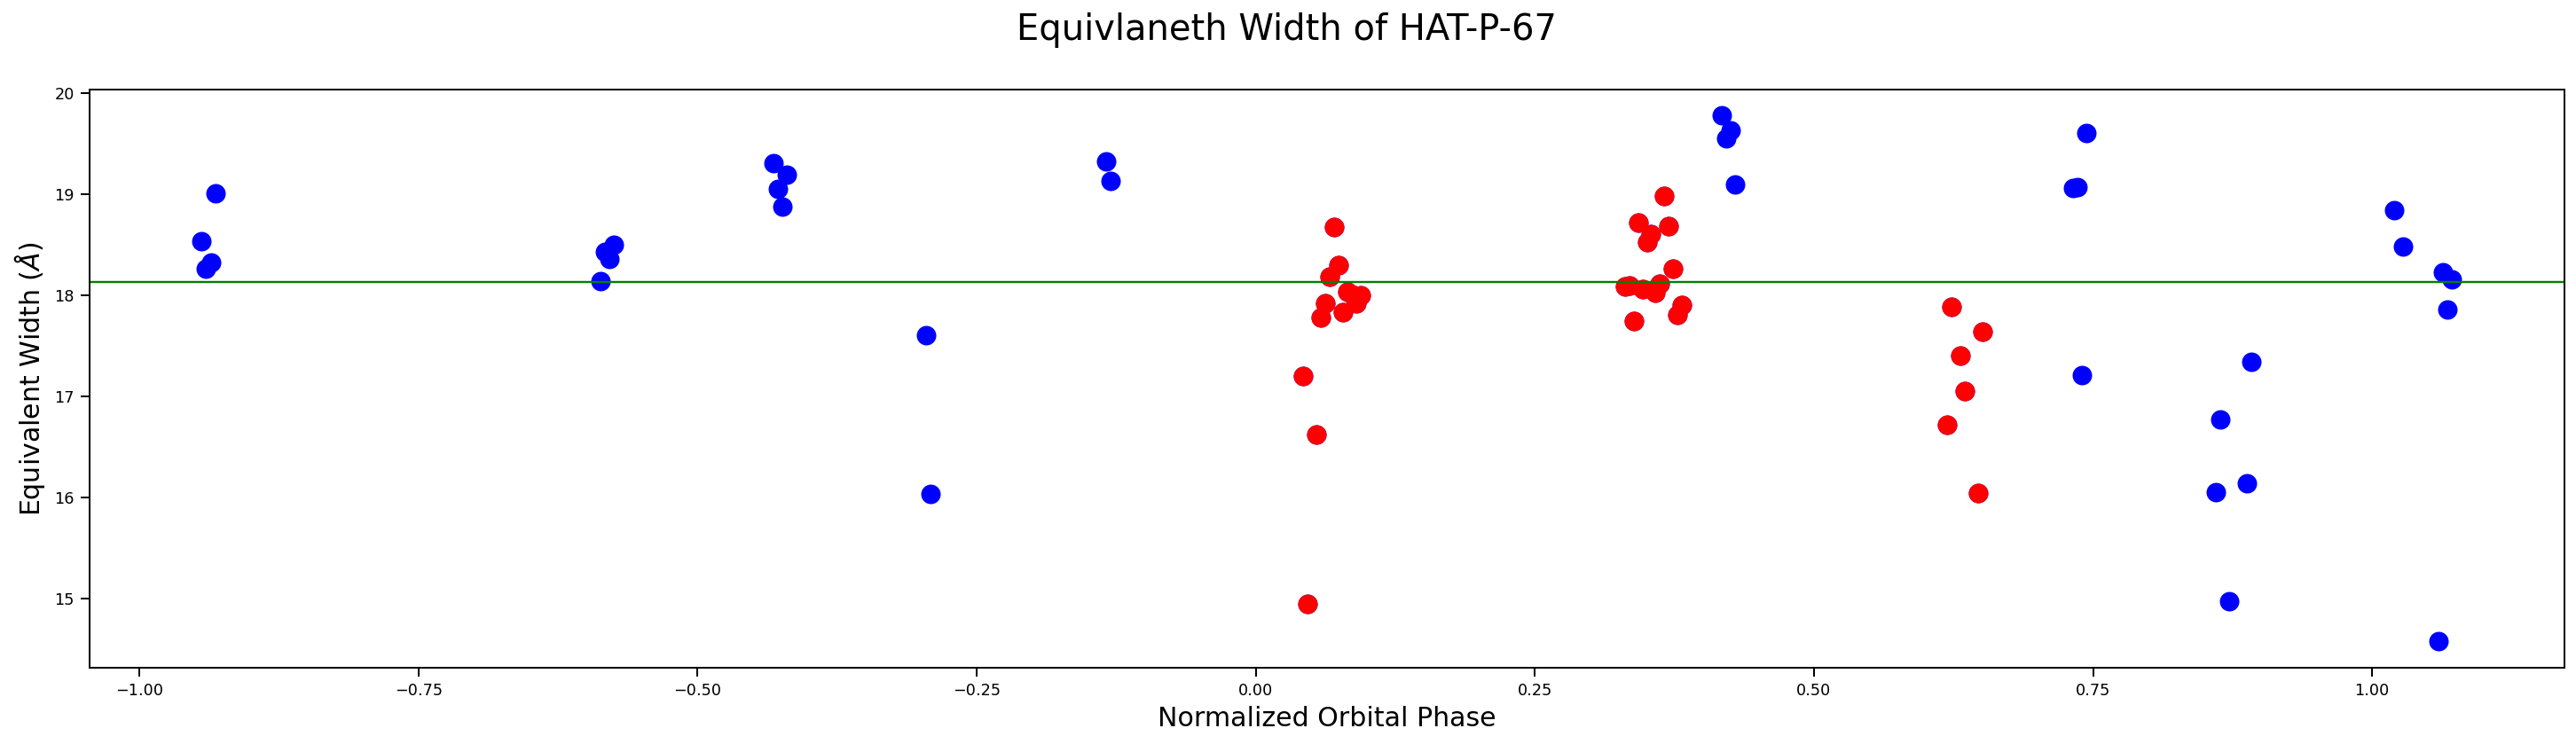

In [74]:
plt.figure(figsize=(25,6))

plt.plot(df.phase, df.ew, 'bo', markersize=10)
plt.plot(df.phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase-1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase+1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
#plt.xlim(-2,2)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Let's define a variable called 'shifted' in two steps.

In [75]:
second_half_mask = df.normalized_phase > 0.5
first_half_mask = ~second_half_mask

In [76]:
df['shifted']=df.normalized_phase
df.shifted[second_half_mask]=df.shifted[second_half_mask]-1
df.shifted[second_half_mask]

Series([], Name: shifted, dtype: float64)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

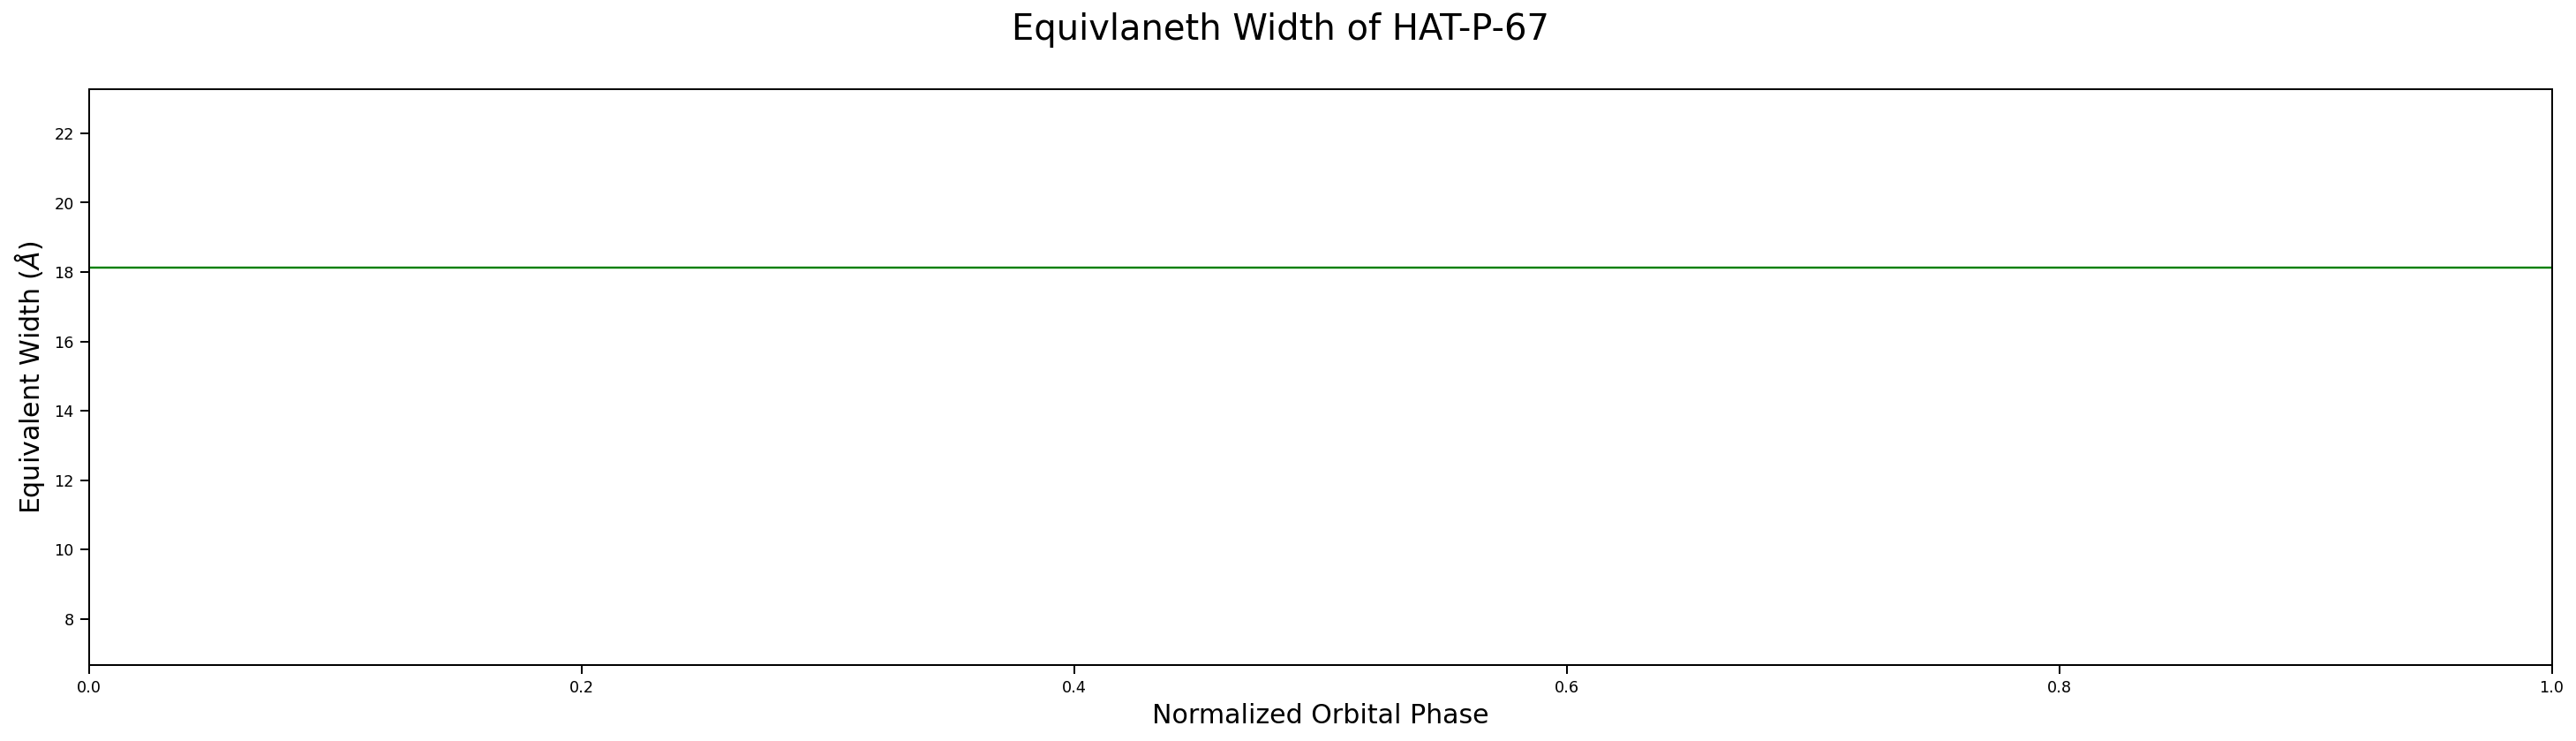

In [77]:
plt.figure(figsize=(25,6))
plt.errorbar(df.shifted, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.shifted[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
#plt.ylim(0.9,1.32)
plt.xlim(0,1)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

# Light curve analysis with TESS

In [34]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[1].download()

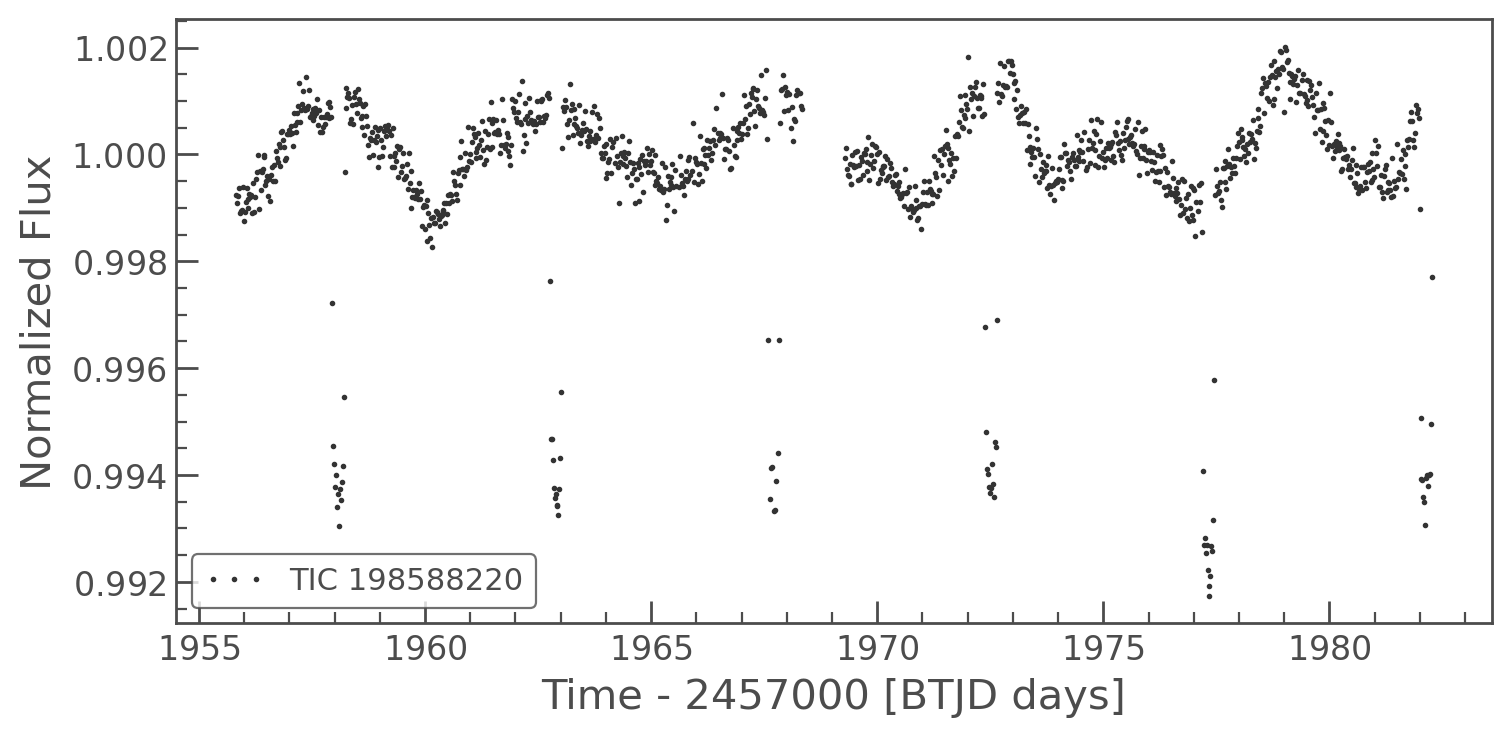

In [35]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

FileNotFoundError: [Errno 2] No such file or directory: '../figures/TESS_EW_HAT-P-67_1.jpg'

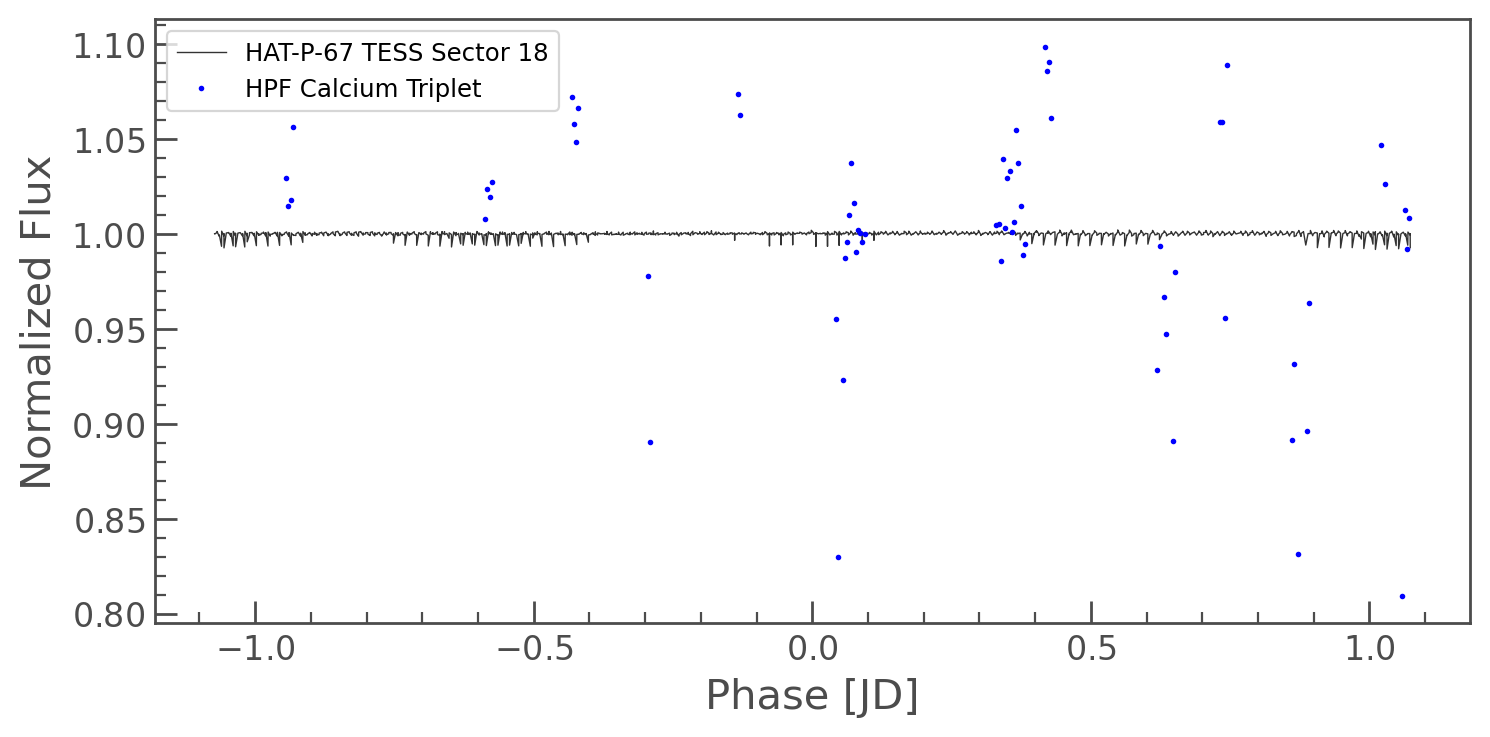

In [36]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 18')
plt.plot(df.phase, df.ew/np.mean(df.ew), 'bo', markersize=1, label = 'HPF Calcium Triplet')
plt.legend()
#plt.ylim(0)
plt.savefig(f'../figures/TESS_EW_{target_name}_1.jpg')

# Exploring different exposure times in the same sector

In [37]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[0].download()

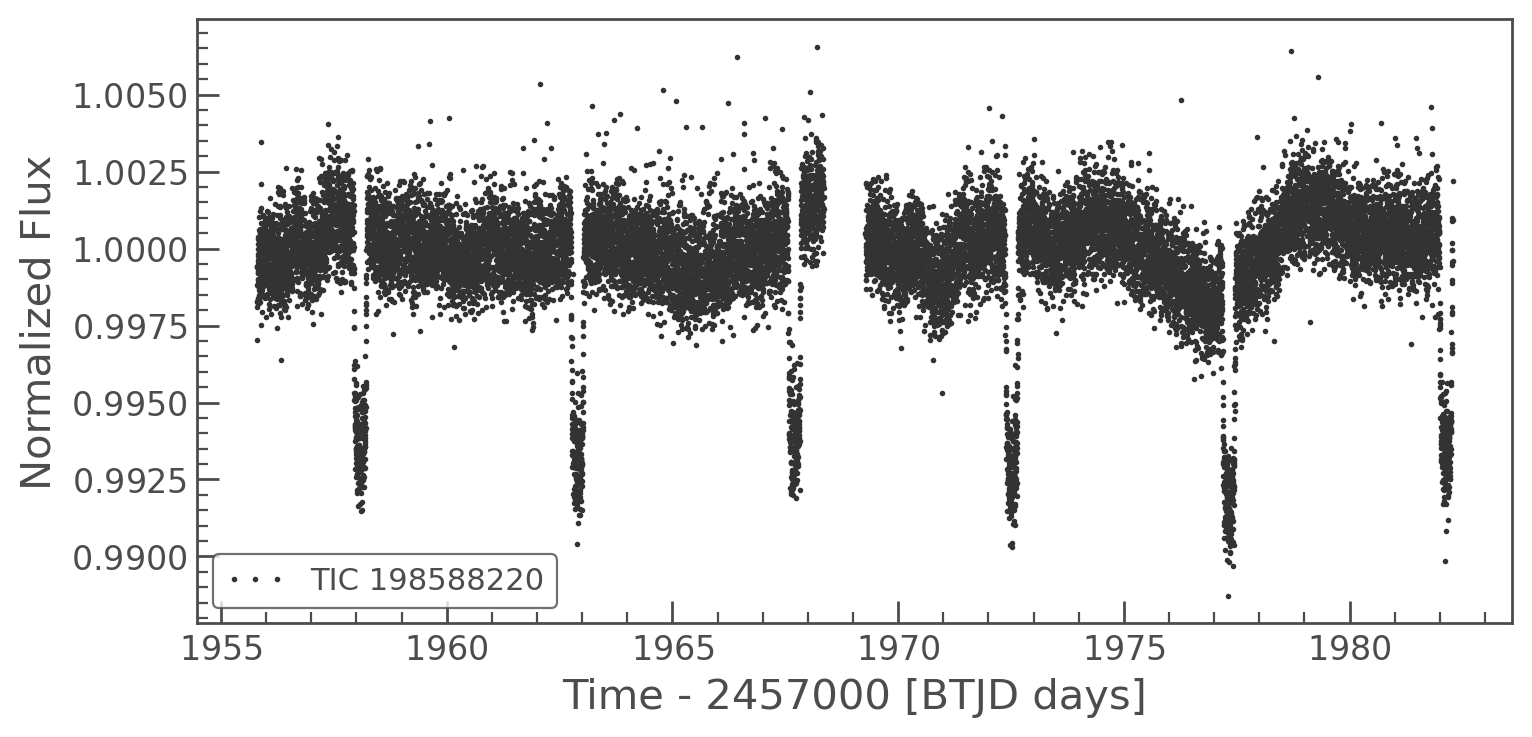

In [38]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

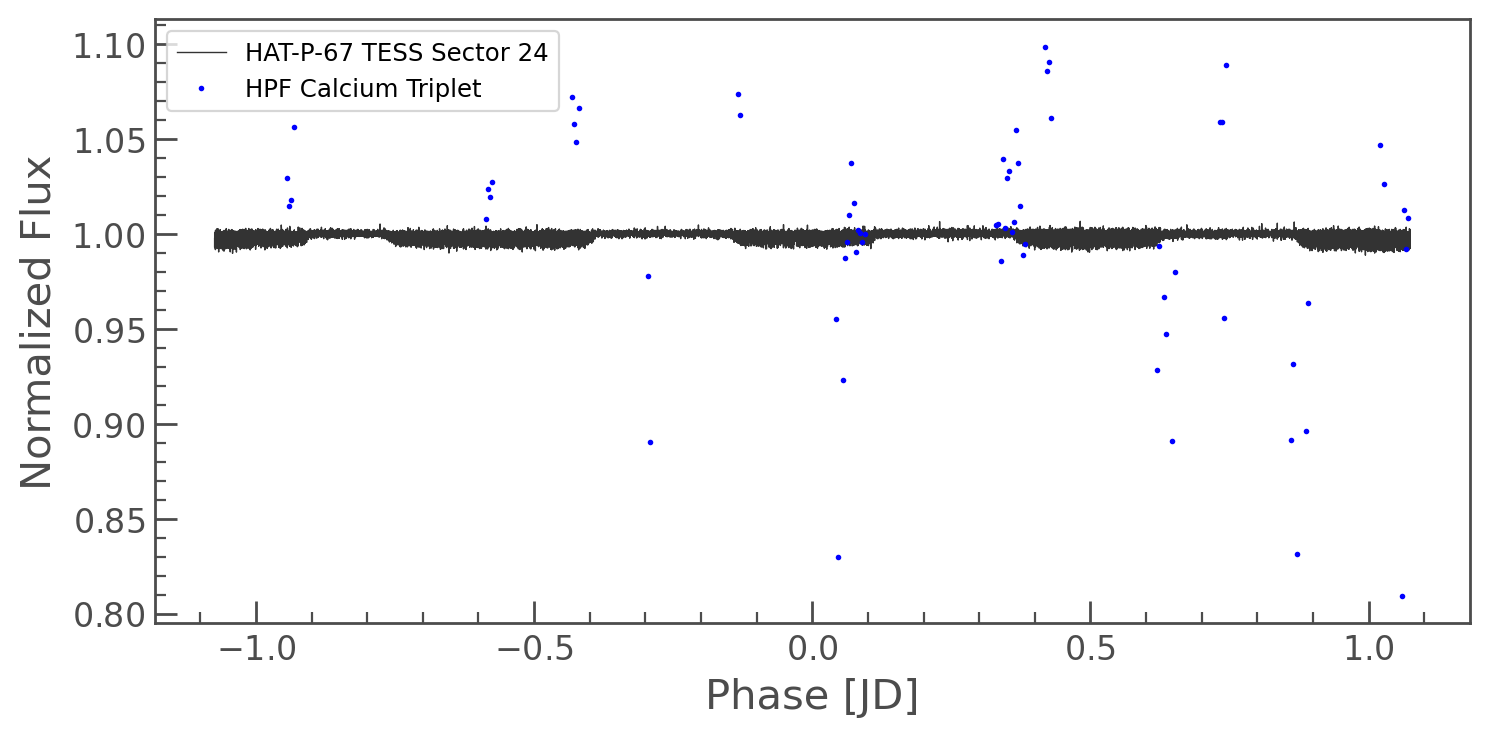

In [40]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 24')
plt.plot(df.phase, df.ew/np.mean(df.ew), 'bo', markersize=1, label = 'HPF Calcium Triplet')
plt.legend()
#plt.savefig(f'../figures/TESS_EW_{target_name}_0.jpg')

# Removing Transiting Planet Signal from TESS Lightcurve


[Documentation for Lightkurve](http://docs.lightkurve.org/tutorials/3-science-examples/periodograms-measuring-a-rotation-period.html)

We will use the Lightkurve package to remove the periodic signal of the planet HAT-P-67b and we will get, as a result, a periodogram of just the star itself.

In [41]:
import lightkurve as lk
import numpy as np
%matplotlib inline

In [42]:
sr = lk.search_lightcurve('HAT-P-67')

In [43]:
lc = sr.download_all().stitch()

C:\Users\jojoa\.conda\envs\disperse_env\lib\site-packages\lightkurve\collections.py:210: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_bkg_err', 'sap_flux', 'sap_bkg'}
  warnings.warn(


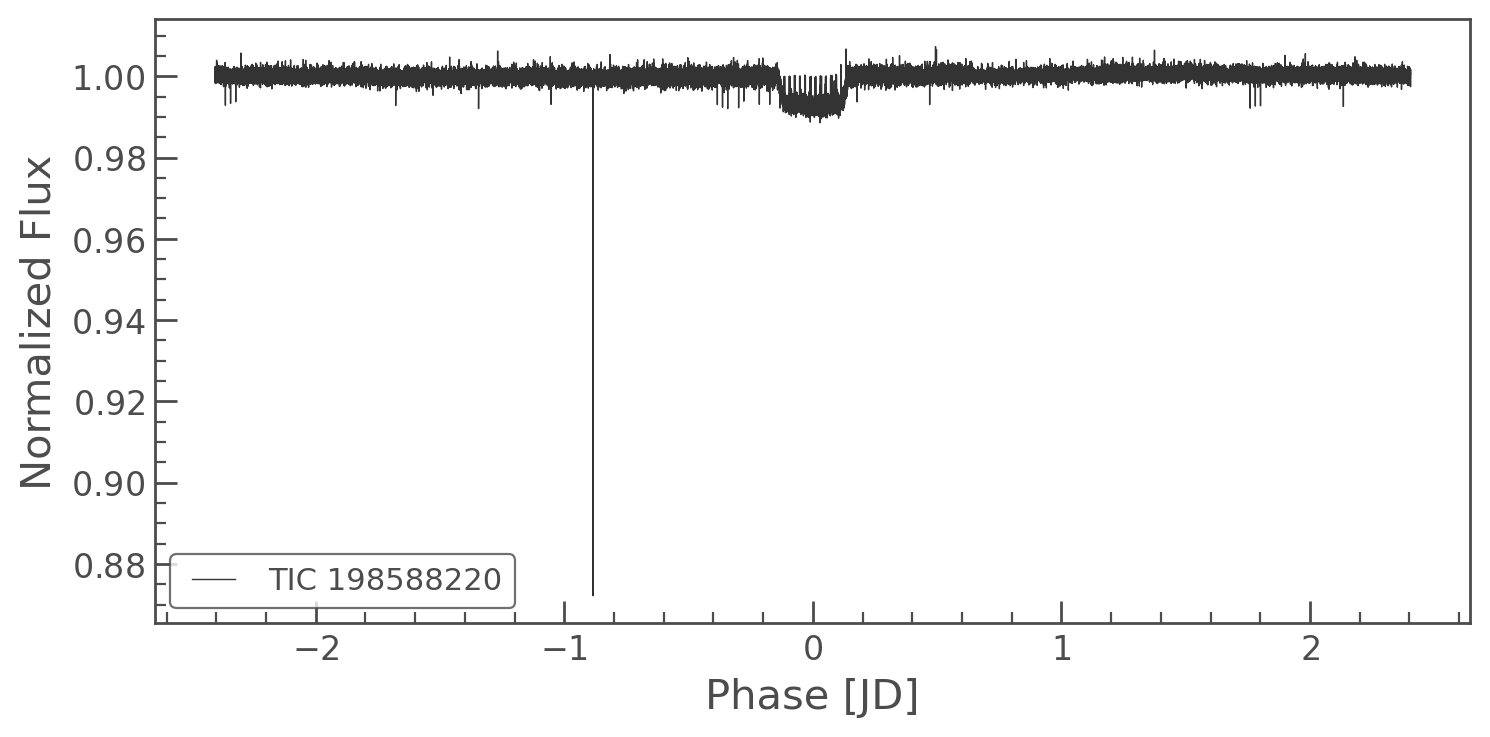

In [44]:
planet_period = 4.81010250
lc.fold(period=planet_period,epoch_time=2455961.38467-2457000).plot();
#plt.ylim(0.99,1.01)

Peak of planet's midpoint transiting period.

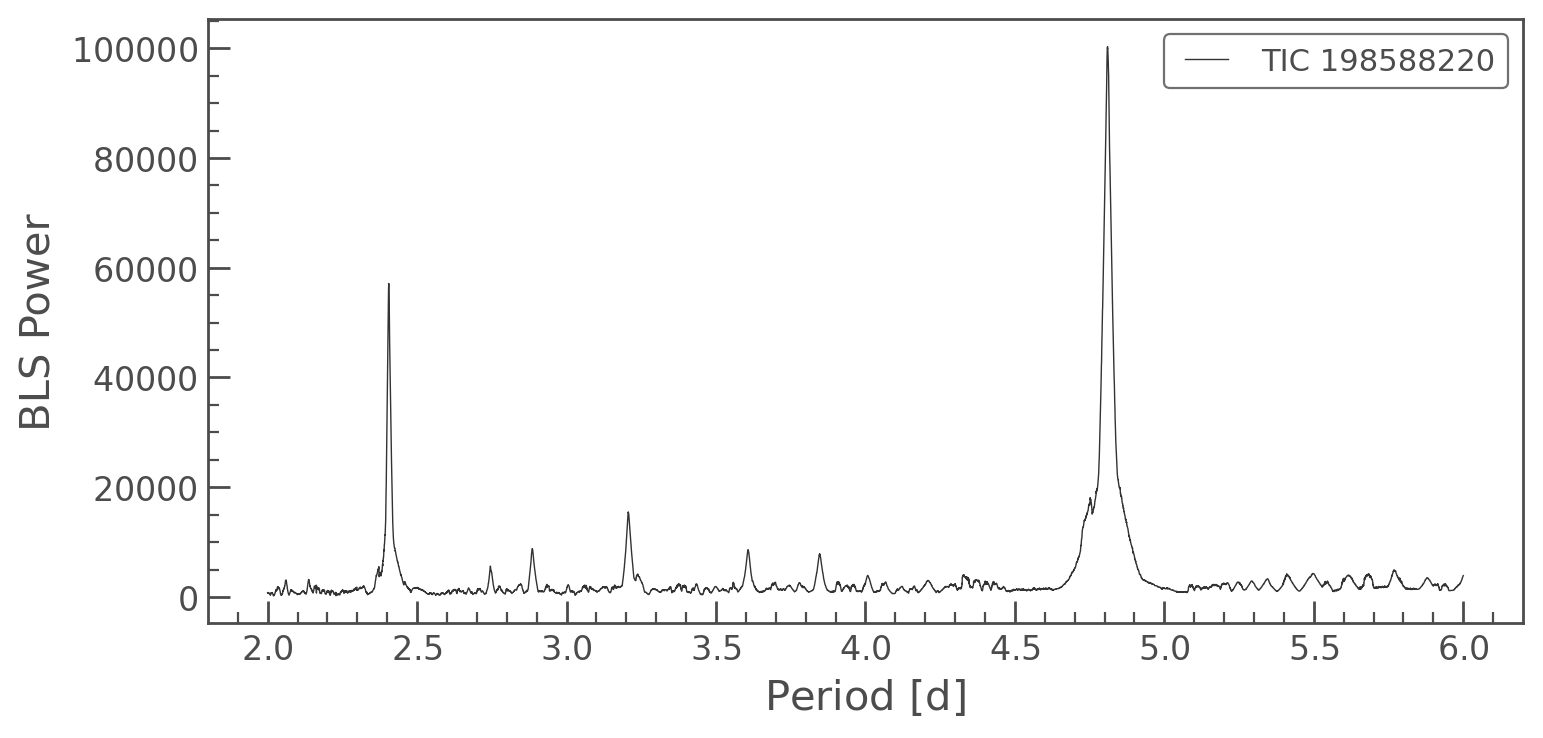

In [45]:
# Create array of periods to search
period = np.linspace(2, 6, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [46]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

planet_b_period,planet_b_t0,planet_b_dur

(<Quantity 4.80988099 d>,
 <Time object: scale='tdb' format='btjd' value=1958.0822267303654>,
 <Quantity 0.25 d>)

In [47]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur*1.1)

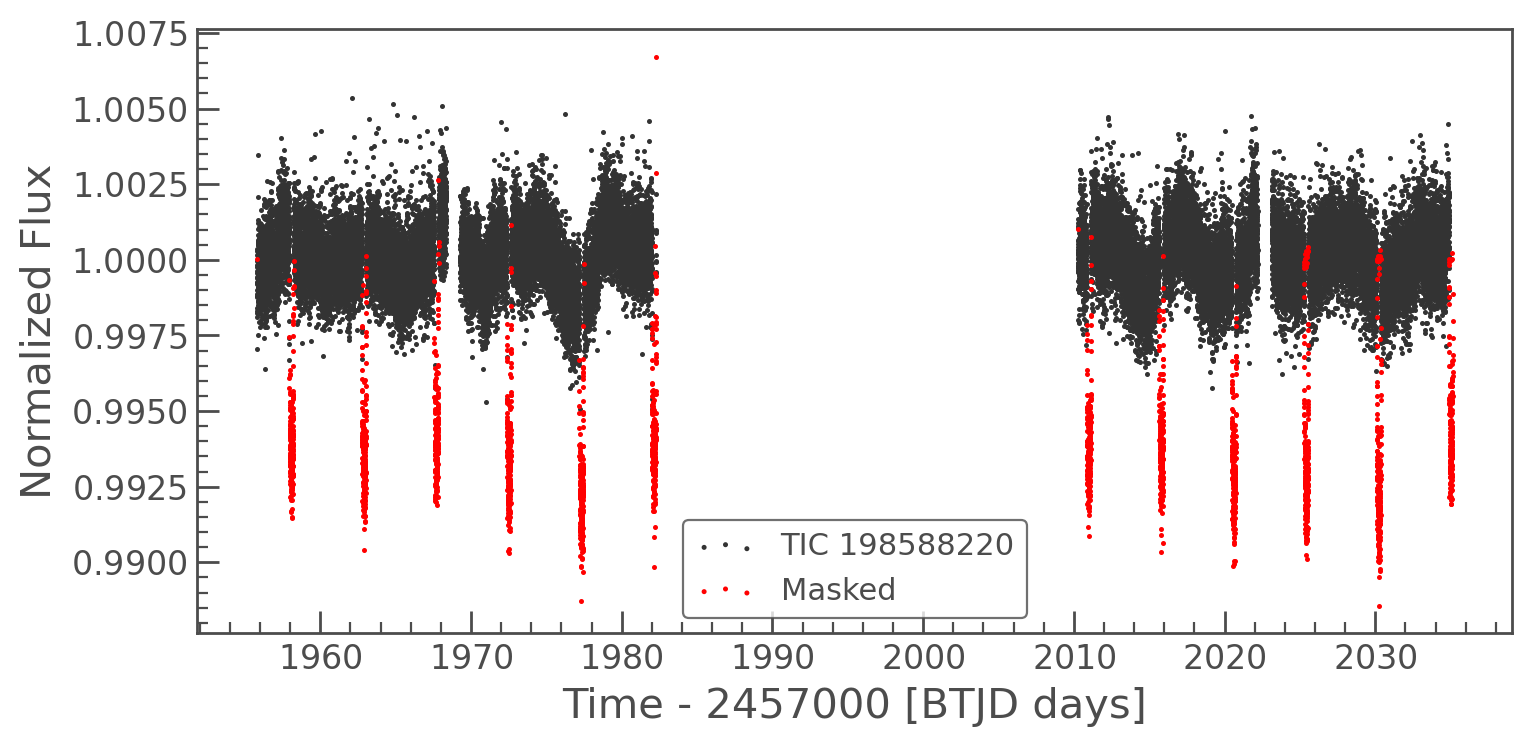

In [48]:
masked_lc = lc[1:][~planet_b_mask]
ax = masked_lc.remove_outliers().scatter();
lc[1:][planet_b_mask].scatter(ax=ax, c='r', label='Masked');

We will now plot just the flux of the star after removing the planet's signal.

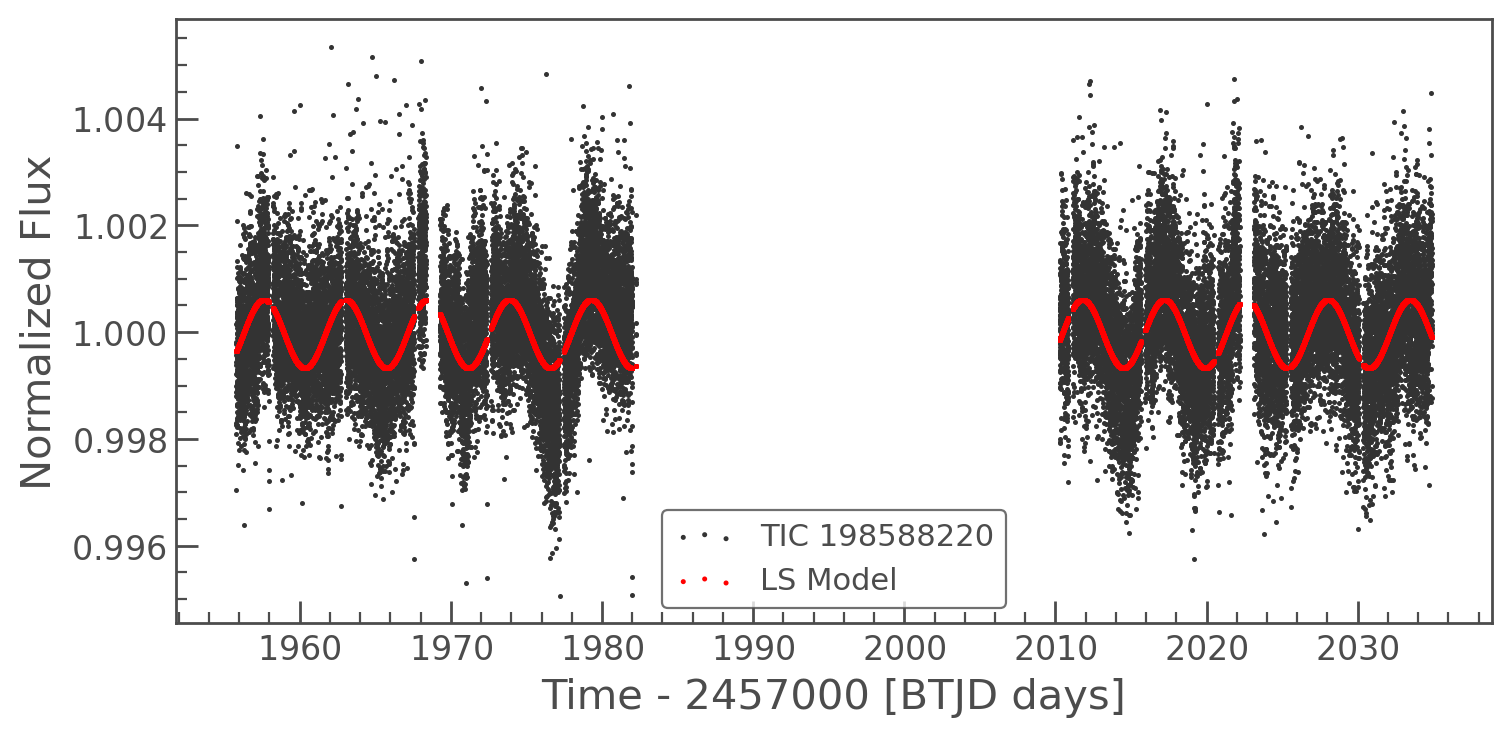

In [51]:
stellar_flux = masked_lc.remove_outliers()
# Create a model light curve for the highest peak in the periodogram
lc_model = pg.model(time=stellar_flux.time, frequency=pg.frequency_at_max_power)
ax = stellar_flux.scatter()
lc_model.scatter(ax=ax, c='red');

C:\Users\jojoa\.conda\envs\disperse_env\lib\site-packages\lightkurve\periodogram.py:932: LightkurveWarning: Building a Lomb Scargle Periodogram using the `slow` method. `nterms` has been set to >1, however this is not supported under the `fast` method. To run with higher nterms, set `ls_method` to either 'fastchi2', or 'chi2'. Please refer to the `astropy.timeseries.periodogram.LombScargle` documentation.
  warnings.warn(


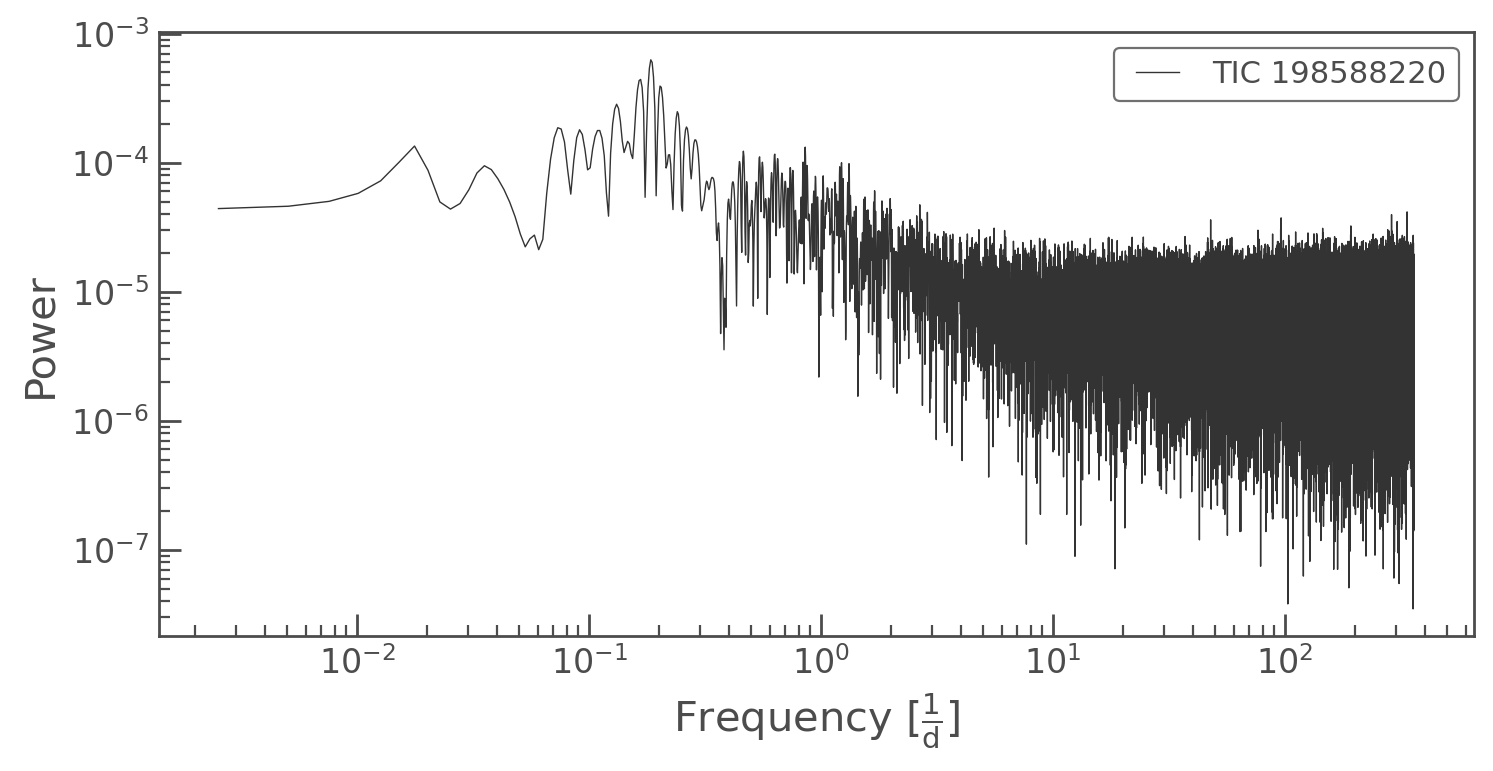

In [54]:
pg = stellar_flux.to_periodogram(nterms=5)
pg.plot(scale='log');
plt.savefig('C:/Users/jojoa/GitHub/disperse/figures/stellar_periodogram.png',bbox_inches="tight")

Rotation period of HAT-P-67!

In [53]:
pg.period_at_max_power

<Quantity 5.41704967 d>

In [ ]:
pg = lc.to_periodogram()
pg.plot(scale='log');
plt.savefig('C:/Users/jojoa/GitHub/disperse/figures/planetary_periodogram.png',bbox_inches='tight')

In [ ]:
# Remove the signals associated with the 50 highest peaks
newlc = lc.copy()
for i in range(50):
  pg = newlc.to_periodogram()
  model = pg.model(time=newlc.time, frequency=pg.frequency_at_max_power)
  newlc.flux = newlc.flux / model.flux

# Plot the new light curve on top of the original one
ax = lc.plot(alpha=.5, label='Original');
newlc.plot(ax=ax, label='New');
plt.ylim(.98,1.02)

In [ ]:
lc_raw = sr[1].download()
lc_raw.fold(period=planet_period).plot();